In [4]:
### Import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
### Create dataframe from csv file
exposure = pd.read_csv('Data for model.csv')
exposure.head()

,year,Annual,ClimateZone,Precip05in,Precip1in,Snow10in,Temp90,FC_Min,FC_Max,PrincArt,...,HseHldH,WalkComH,TransComH,DegreeH,NoVehH,WalkComPctH,TransComPctH,NonWhitePctH,DegreePctH,NoVehPctH
0,2014,1.008715e+05,3,160,55,0.0,4.0,4,7,1,...,3442.366473,166.738041,1018.284763,1099.640883,947.562614,0.044633,0.272576,0.226225,0.193205,0.275265
1,2014,1.160158e+06,3,160,55,0.0,4.0,3,3,2,...,3162.386495,158.532153,773.437362,1590.916415,508.269792,0.036902,0.180034,0.326323,0.264586,0.160723
2,2014,5.230030e+05,3,160,55,0.0,4.0,3,7,1,...,4858.992498,916.155792,1430.823715,2858.854956,805.819303,0.155156,0.242317,0.723288,0.373215,0.165841
3,2014,5.453961e+05,3,160,55,0.0,4.0,3,7,1,...,2755.337596,111.032411,383.858091,721.283123,147.926427,0.026330,0.091027,0.348611,0.119821,0.053687
4,2014,1.303617e+05,3,160,55,0.0,4.0,3,4,1,...,1338.560970,22.904996,44.223395,574.407818,65.102869,0.017433,0.033658,0.334453,0.208903,0.048636


In [6]:
### Select variables & check mean, std dev., min, & max value.
df = exposure[['Annual', 'Int4way','Snow10in', 'SchoolsH', 'Signal', 'AllTransitH','Jobs30H', 'PopT']]
df.describe()

,Annual,Int4way,Snow10in,SchoolsH,Signal,AllTransitH,Jobs30H,PopT
count,1.301000e+03,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1.301000e+03,1301.000000
mean,7.328024e+05,0.694081,0.212452,1.882398,0.490392,5.669776,9.730359e+05,237.709650
std,2.029549e+06,0.460973,1.013796,1.874322,0.500100,3.105202,1.733345e+06,259.902302
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,3.550104e+04,0.000000,0.000000,0.000000,0.000000,3.099828,6.017384e+03,66.095605
50%,1.434238e+05,1.000000,0.000000,1.000000,0.000000,6.498840,1.591286e+05,167.359809
75%,5.436381e+05,1.000000,0.000000,3.000000,1.000000,8.408637,1.064683e+06,334.644143
max,2.579122e+07,1.000000,5.600000,9.000000,1.000000,9.986393,1.050488e+07,3799.904870


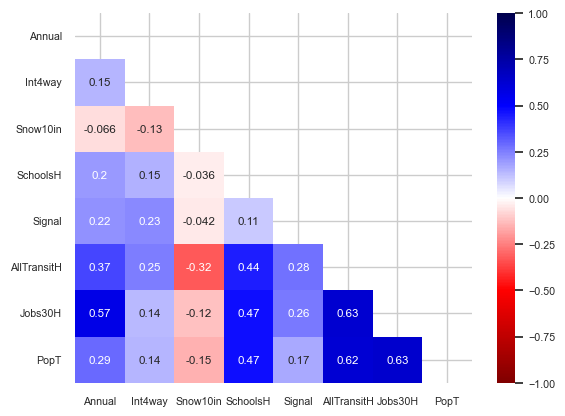

In [7]:
#Create heatmap of correlations among the variables
sns.set(context='notebook', style='whitegrid', font_scale=0.7)
upper = np.triu(df.corr())  # Here, we are looking at the upper triangle. Optionally, you can just look at the lower triangle. 
sns.heatmap(df.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1, mask=upper);
plt.savefig('heatmap.png')

In [8]:
#Splitting into training & test data
X_train, X_test, y_train, y_test = train_test_split(df[['Int4way','Snow10in', 'SchoolsH', 'Signal', 'AllTransitH','Jobs30H', 'PopT']], df['Annual'], test_size=0.2, random_state=20)

In [9]:
### Fit a linear regression model using statsmodels

import statsmodels.api as sm

# List of all explanatory variables in the order you'd like to add them:
predictors = ['Int4way', 'Snow10in', 'SchoolsH', 'Signal', 'AllTransitH', 'PopT', 'Jobs30H']

# Fit models adding one predictor at a time
for i in range(1, len(predictors) + 1):
    current_vars = predictors[:i]
    X_curr = sm.add_constant(X_train[current_vars])
    model = sm.OLS(y_train, X_curr).fit()
    print(f"\nModel with predictors: {current_vars}")
    print(model.summary())


Model with predictors: ['Int4way']
                            OLS Regression Results                            
Dep. Variable:                 Annual   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     22.43
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           2.48e-06
Time:                        17:03:27   Log-Likelihood:                -16620.
No. Observations:                1040   AIC:                         3.324e+04
Df Residuals:                    1038   BIC:                         3.325e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.75

In [10]:
### Fit a Poisson regression model using statsmodels

import statsmodels.api as sm

# List of explanatory variables in the order you'd like to add them:
predictors = ['Int4way', 'Snow10in', 'SchoolsH', 'Signal', 'AllTransitH', 'PopT', 'Jobs30H']

# Iteratively build Poisson regression models
for i in range(1, len(predictors) + 1):
    current_vars = predictors[:i]
    X_curr = sm.add_constant(X_train[current_vars])
    poisson_model = sm.GLM(y_train, X_curr, family=sm.families.Poisson()).fit()
    print(f"\nPoisson Model with predictors: {current_vars}")
    print(poisson_model.summary())


Poisson Model with predictors: ['Int4way']
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Annual   No. Observations:                 1040
Model:                            GLM   Df Residuals:                     1038
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0230e+09
Date:                Wed, 19 Feb 2025   Deviance:                   2.0459e+09
Time:                        17:03:27   Pearson chi2:                 5.88e+09
No. Iterations:                     9   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const   

In [11]:
### Fit a Negative Binomial regression model using statsmodels

import statsmodels.api as sm

# List of explanatory variables in the order you'd like to add them
predictors = ['Int4way', 'Snow10in', 'SchoolsH', 'Signal', 'AllTransitH', 'PopT', 'Jobs30H']

# Iteratively build Negative Binomial models
for i in range(1, len(predictors) + 1):
    current_vars = predictors[:i]
    X_curr = sm.add_constant(X_train[current_vars])
    nb_model = sm.GLM(y_train, X_curr, family=sm.families.NegativeBinomial(alpha=1)).fit()
    print(f"\nNegative Binomial Model with predictors: {current_vars}")
    print(nb_model.summary())


Negative Binomial Model with predictors: ['Int4way']
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Annual   No. Observations:                 1040
Model:                            GLM   Df Residuals:                     1038
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14950.
Date:                Wed, 19 Feb 2025   Deviance:                       3844.4
Time:                        17:03:27   Pearson chi2:                 9.81e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2362
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

Non-finite values found in y_pred!
max: 1.2150073969165267e+308
min: 28080.9556408886
MSE: 65909906125183.47
RMSE: 8118491.6163769895
MAE: 7104500.208496759
R^2: -26.5163803448109


C:\Users\Anson\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\genmod\families\links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)


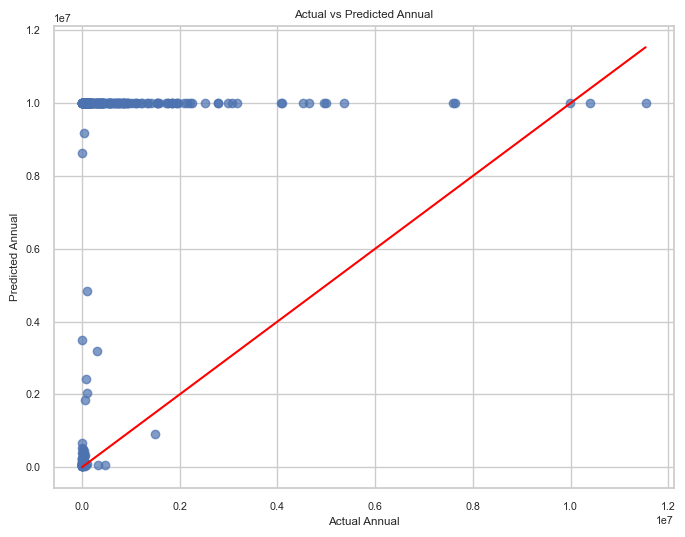

In [12]:
### Evaluate the Negative Binomial model on test data

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Splitting data
predictors = ['Int4way', 'Snow10in', 'SchoolsH', 'Signal', 'AllTransitH', 'Jobs30H', 'PopT']
X_train, X_test, y_train, y_test = train_test_split(
    df[predictors], df['Annual'], test_size=0.2, random_state=20
)

# Note: nb_model should be your final Negative Binomial model trained using X_train and y_train.
# Prepare test set by adding a constant to X_test (using the same predictors)
X_test_const = sm.add_constant(X_test)
y_pred = nb_model.predict(X_test_const)

# Check for non-finite values in predictions
if not np.all(np.isfinite(y_pred)):
    print("Non-finite values found in y_pred!")
    print("max:", np.max(y_pred[np.isfinite(y_pred)]))
    print("min:", np.min(y_pred[np.isfinite(y_pred)]))

# Clip predictions to avoid extreme values (example limits, adjust as necessary)
y_pred_clipped = np.clip(y_pred, a_min=None, a_max=1e7)  # set a realistic maximum

# Then compute performance metrics on clipped predictions
mse = mean_squared_error(y_test, y_pred_clipped)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_clipped)
r2  = r2_score(y_test, y_pred_clipped)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_clipped, alpha=0.7)
plt.xlabel("Actual Annual")
plt.ylabel("Predicted Annual")
plt.title("Actual vs Predicted Annual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.show()